In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [96]:
df = pd.read_csv('iris_shorted.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.3,1.7,0.5,Iris-setosa
1,4.4,3.2,1.3,0.2,Iris-setosa
2,5.4,3.4,1.7,0.2,Iris-setosa
3,5.1,3.8,1.5,0.3,Iris-setosa
4,4.9,3.0,1.4,0.2,Iris-setosa


In [97]:
df.shape

(30, 5)

In [98]:
X = df.drop('Species',axis=1).values
y = df['Species'].values
print(X)
print(y)

[[5.1 3.3 1.7 0.5]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.7 0.2]
 [5.1 3.8 1.5 0.3]
 [4.9 3.  1.4 0.2]
 [5.1 3.8 1.6 0.2]
 [5.1 3.7 1.5 0.4]
 [5.8 4.  1.2 0.2]
 [5.  3.6 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.8 2.7 4.1 1. ]
 [5.6 2.7 4.2 1.3]
 [5.6 2.5 3.9 1.1]
 [5.7 2.6 3.5 1. ]
 [6.1 2.8 4.  1.3]
 [6.7 3.  5.  1.7]
 [5.8 2.7 3.9 1.2]
 [6.6 2.9 4.6 1.3]
 [4.9 2.4 3.3 1. ]
 [6.7 3.1 4.7 1.5]
 [6.3 3.4 5.6 2.4]
 [6.4 3.1 5.5 1.8]
 [6.3 2.7 4.9 1.8]
 [7.2 3.6 6.1 2.5]
 [5.8 2.7 5.1 1.9]
 [6.8 3.  5.5 2.1]
 [7.9 3.8 6.4 2. ]
 [6.9 3.1 5.1 2.3]
 [6.4 2.7 5.3 1.9]
 [6.9 3.1 5.4 2.1]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 

In [100]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42, stratify=y)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,5)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

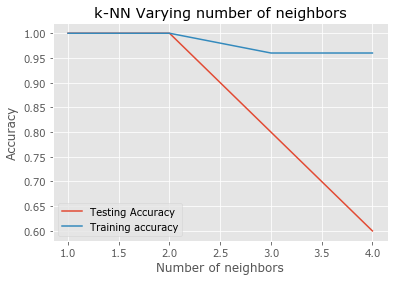

In [103]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [104]:
knn = KNeighborsClassifier(n_neighbors=5)

In [105]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
knn.score(X_test,y_test)

0.8

In [107]:
from sklearn.metrics import confusion_matrix

In [110]:
iris_test = pd.read_csv('iris_onlyTesting.csv')
iris_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.4,3.9,1.3,0.4
1,4.8,3.1,1.6,0.2
2,6.1,2.9,4.7,1.4
3,6.3,2.5,4.9,1.5
4,6.2,2.8,4.8,1.8


In [111]:
x_t = iris_test.values
y_pred = knn.predict(x_t)
print(y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica']


In [114]:
iris_test['Specie'] = pd.Series(y_pred)

So the prediction is: 

In [115]:
iris_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Specie
0,5.4,3.9,1.3,0.4,Iris-setosa
1,4.8,3.1,1.6,0.2,Iris-setosa
2,6.1,2.9,4.7,1.4,Iris-versicolor
3,6.3,2.5,4.9,1.5,Iris-versicolor
4,6.2,2.8,4.8,1.8,Iris-virginica
